In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error, mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

#### **Load and Explore the Dataset**

In [131]:
df=pd.read_csv("world_smoking_history_1924_2023.csv")

In [132]:
df

,Year,Smoking_Population_Percentage,Male_Smokers_Percentage,Female_Smokers_Percentage,Smoking_Related_Deaths,Country,City,Age_Limit,Death_History,Average_Cigarettes_Per_Day,Healthcare_Costs,Anti_Smoking_Campaigns,Legislation_Strength,Youth_Smokers_Percentage
0,1924,25,15.0,10.0,152267,USA,New York,18,152267,11,939559442622,2,8,6.710115
1,1925,26,15.6,10.4,960004,UK,London,18,960004,8,894932523077,53,8,3.610776
2,1926,27,16.2,10.8,355508,Germany,Berlin,18,355508,17,598302078832,44,7,4.921311
3,1927,28,16.8,11.2,968208,France,Paris,18,0,19,921952360788,90,3,6.717268
4,1928,29,17.4,11.6,823252,Japan,Tokyo,20,0,15,89404009549,32,1,3.702448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,1,0.6,0.4,615226,China,Beijing,18,615226,17,503176344205,33,8,0.273423
96,2020,1,0.6,0.4,795287,India,Mumbai,18,0,19,52427272498,14,5,0.212373
97,2021,1,0.6,0.4,712194,Brazil,São Paulo,18,712194,6,279367817772,21,5,0.147719
98,2022,1,0.6,0.4,127460,Russia,Moscow,18,127460,14,908357620080,48,7,0.235969


In [133]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print('\nColumn names:')
print(df.columns)
print('\nData types:')
print(df.dtypes)

The dataset has 100 rows and 14 columns.

Column names:
Index(['Year', 'Smoking_Population_Percentage', 'Male_Smokers_Percentage',
       'Female_Smokers_Percentage', 'Smoking_Related_Deaths', 'Country',
       'City', 'Age_Limit', 'Death_History', 'Average_Cigarettes_Per_Day',
       'Healthcare_Costs', 'Anti_Smoking_Campaigns', 'Legislation_Strength',
       'Youth_Smokers_Percentage'],
      dtype='object')

Data types:
Year                               int64
Smoking_Population_Percentage      int64
Male_Smokers_Percentage          float64
Female_Smokers_Percentage        float64
Smoking_Related_Deaths             int64
Country                           object
City                              object
Age_Limit                          int64
Death_History                      int64
Average_Cigarettes_Per_Day         int64
Healthcare_Costs                   int64
Anti_Smoking_Campaigns             int64
Legislation_Strength               int64
Youth_Smokers_Percentage         float64

#### **Summary Statistics**

In [134]:
unique_values_counts = {}
for column in df.columns:
    unique_values_counts[column] = df[column].value_counts()
for column, values_counts in unique_values_counts.items():
    print(f"Unique values and counts for column '{column}':\n{values_counts}\n")

Unique values and counts for column 'Year':
Year
1924    1
1987    1
1997    1
1996    1
1995    1
       ..
1954    1
1953    1
1952    1
1951    1
2023    1
Name: count, Length: 100, dtype: int64

Unique values and counts for column 'Smoking_Population_Percentage':
Smoking_Population_Percentage
1     16
41     2
54     2
53     2
26     2
51     2
50     2
49     2
48     2
47     2
46     2
45     2
44     2
43     2
42     2
25     2
40     2
32     2
39     2
27     2
28     2
29     2
30     2
31     2
52     2
33     2
38     2
35     2
36     2
37     2
34     2
10     1
9      1
8      1
7      1
5      1
6      1
12     1
4      1
3      1
2      1
11     1
15     1
13     1
14     1
16     1
17     1
18     1
19     1
21     1
22     1
23     1
24     1
55     1
20     1
Name: count, dtype: int64

Unique values and counts for column 'Male_Smokers_Percentage':
Male_Smokers_Percentage
0.6     16
24.6     2
32.4     2
31.8     2
15.6     2
30.6     2
30.0     2
29.4     2
28.8 

In [135]:
df.describe()

,Year,Smoking_Population_Percentage,Male_Smokers_Percentage,Female_Smokers_Percentage,Smoking_Related_Deaths,Age_Limit,Death_History,Average_Cigarettes_Per_Day,Healthcare_Costs,Anti_Smoking_Campaigns,Legislation_Strength,Youth_Smokers_Percentage
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,1973.500000,27.400000,16.440000,10.960000,534536.620000,18.200000,287784.980000,12.270000,4.809195e+11,49.840000,5.330000,5.302033
std,29.011492,17.688094,10.612857,7.075238,263008.826635,0.603023,328288.556836,4.251809,2.991337e+11,29.691246,2.937239,3.780880
min,1924.000000,1.000000,0.600000,0.400000,52460.000000,18.000000,0.000000,5.000000,6.516595e+09,1.000000,1.000000,0.107837
25%,1948.750000,10.750000,6.450000,4.300000,325758.250000,18.000000,0.000000,8.750000,2.376341e+11,23.750000,3.000000,1.878041
50%,1973.500000,30.000000,18.000000,12.000000,522086.000000,18.000000,110165.000000,12.000000,4.504281e+11,48.000000,6.000000,5.551527
75%,1998.250000,42.250000,25.350000,16.900000,772508.000000,18.000000,561333.250000,16.000000,7.712719e+11,73.500000,8.000000,7.685588
max,2023.000000,55.000000,33.000000,22.000000,987124.000000,20.000000,987124.000000,19.000000,9.869000e+11,99.000000,10.000000,14.203301


##### **Summary Statistic Insights**

1. **Year**: data spans from 1924 to 2023

2. **Smoking_Population_Percentage** : Ranges from 1% to 55%
3. **Male_Smokers_Percentage** : Ranges from 0.6% to 33%
4. **Female_Smokers_Percentage** : Ranges from 0.4% to 22%
5. **Smoking_Related_Deaths** : Ranges from 52,460 to 987,124
6. **Age_Limit** : Primarily 18, with a few records at 20
7. **Death_History** : Median value of 110,165, ranging up to 987,124
8. **Average_Cigarettes_Per_Day** : Ranges from 5 to 19
9. **Healthcare_Costs** : Large variation from 6.5 billion to 986.9 billion
10. **Anti_Smoking_Campaigns** : Wide range, with a maximum of 99 campaigns
11. **Legislation_Strength** : Varies from 1 to 10
12. **Youth_Smokers_Percentage** : Ranges from 0.1% to 14.2%

##### **Data Cleaning**

In [136]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
Year                             0
Smoking_Population_Percentage    0
Male_Smokers_Percentage          0
Female_Smokers_Percentage        0
Smoking_Related_Deaths           0
Country                          0
City                             0
Age_Limit                        0
Death_History                    0
Average_Cigarettes_Per_Day       0
Healthcare_Costs                 0
Anti_Smoking_Campaigns           0
Legislation_Strength             0
Youth_Smokers_Percentage         0
dtype: int64


In [137]:
print('Duplicate Value:')
print(df.duplicated().sum())

Duplicate Value:
0


##### **Comparative Analysis By Each Country**

In [138]:
country_comparison = df.groupby('Country')[[
    'Smoking_Population_Percentage', 
    'Male_Smokers_Percentage',
    'Female_Smokers_Percentage',
    'Smoking_Related_Deaths',
    'Healthcare_Costs',
    'Anti_Smoking_Campaigns',
    'Legislation_Strength',
    'Youth_Smokers_Percentage'
]].mean().sort_values(by='Smoking_Population_Percentage', ascending=False)

country_comparison.reset_index(inplace=True)


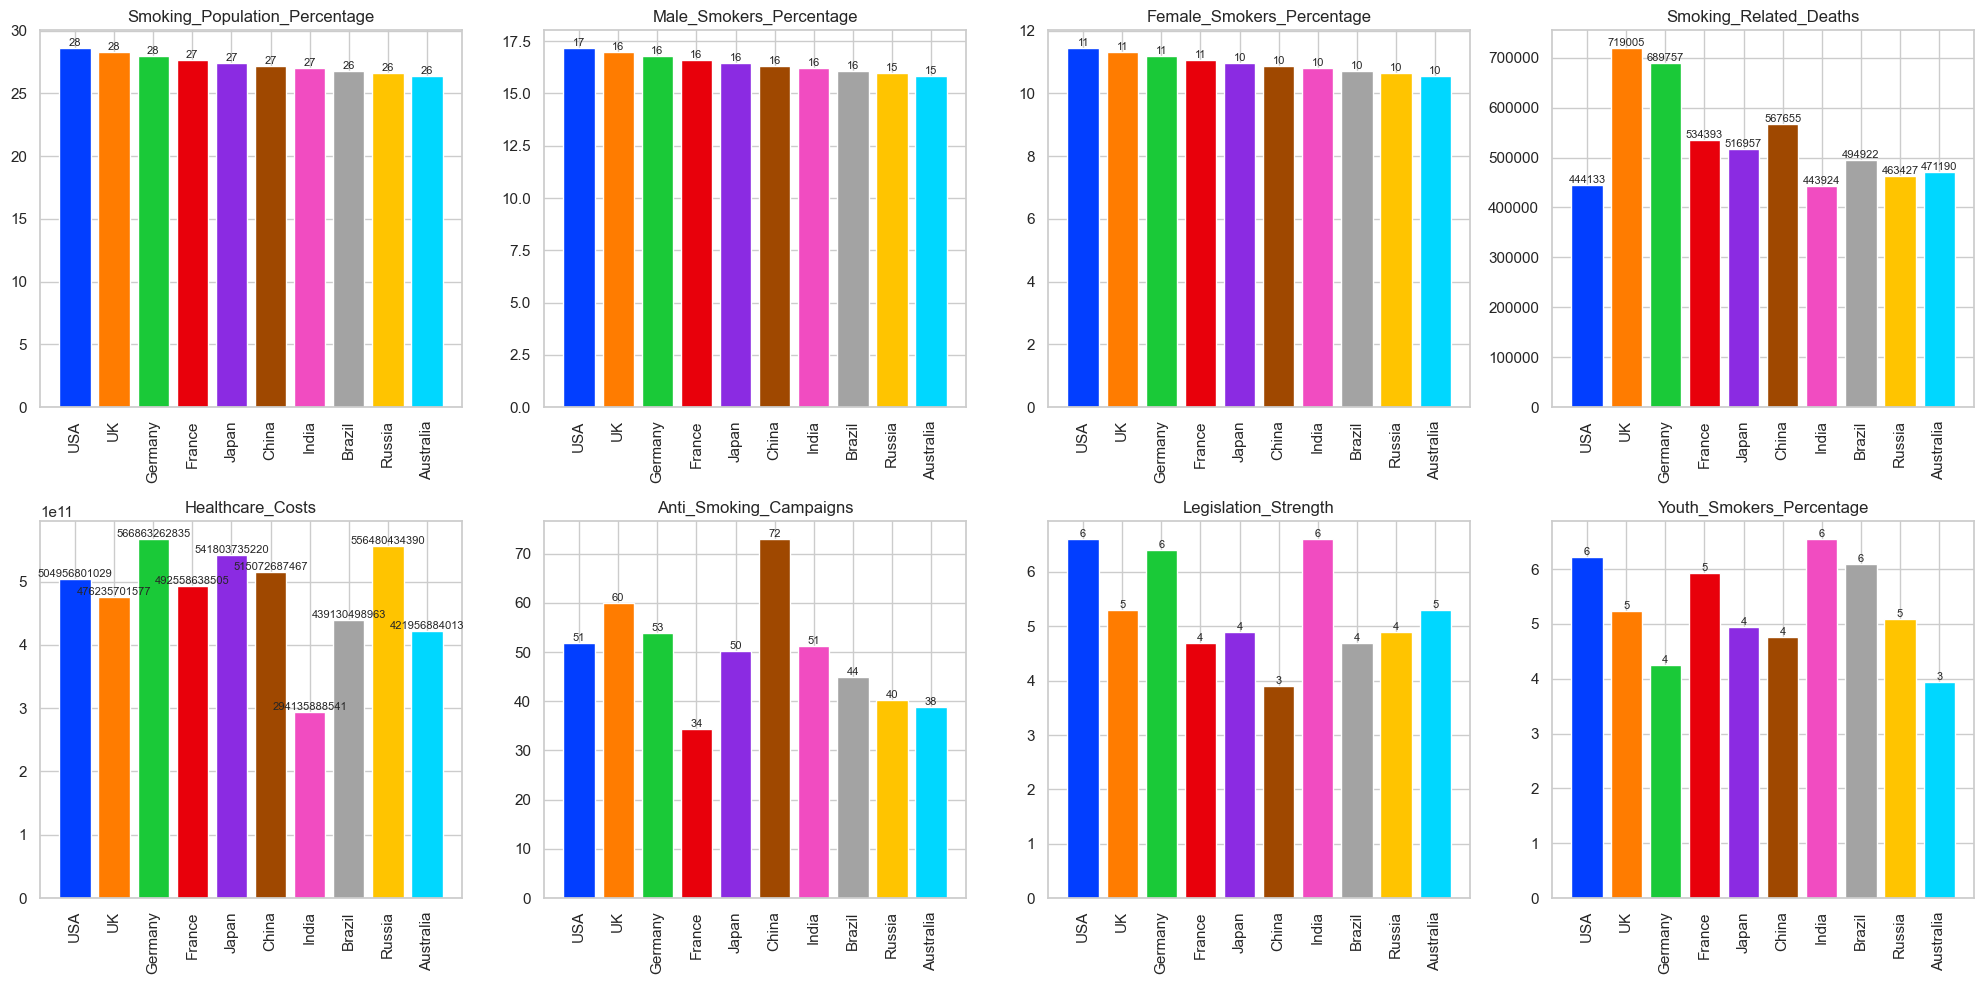

In [139]:
plt.figure(figsize=(20, 10))
metrics = [
    'Smoking_Population_Percentage', 
    'Male_Smokers_Percentage',
    'Female_Smokers_Percentage',
    'Smoking_Related_Deaths',
    'Healthcare_Costs',
    'Anti_Smoking_Campaigns',
    'Legislation_Strength',
    'Youth_Smokers_Percentage'
]

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 4, i)
    bars = plt.bar(country_comparison['Country'], country_comparison[metric], color=sns.color_palette("bright", len(country_comparison['Country'])))
    plt.xticks(rotation=90)
    plt.title(metric)
    plt.tight_layout()
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(j, height, str(int(height)), ha='center', va='bottom', fontsize=8)

plt.show()

##### **Youth Smoking**

**Plot Youth Smoking Trends Over Time**

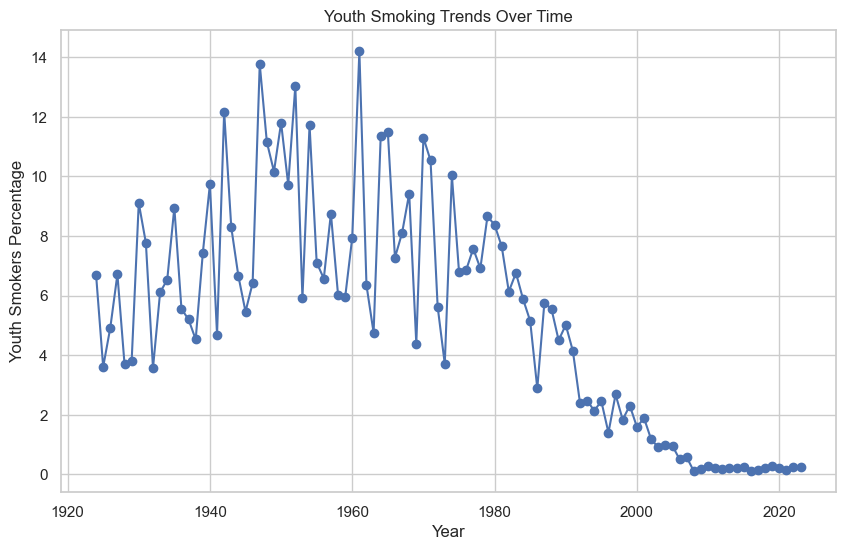

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Youth_Smokers_Percentage'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Youth Smokers Percentage')
plt.title('Youth Smoking Trends Over Time')
plt.grid(True)
plt.show()

1. **1920-1940** : The youth smoking percentage fluctuated around 4% to nearly 10%. There were some noticeble peaks and troughs, indicating variability in youth smoking rates during this period.
2. **1940-1960** : The trends in youth smoking percentages, with several spikers reaching around 12%-14% .
3. **1960-1980** : Youth smoking percentages showed high variability but began to decline from the peaks around 1963s. The decline may correspond with growing public health campaigns and increased awareness of the dangers of smoking.
4. **1980-2000** : There was a more consistent and significant decline in youth smoking percentages.
5. **2020-2023** : Youth smoking percentages have remained low and relatively stable, fluctuating around 2% or less. The sustained low rates suggest the continuing effectiveness of public health efforts and legislative measures in reducing youth smoking.
 

**Analyze the data by country**

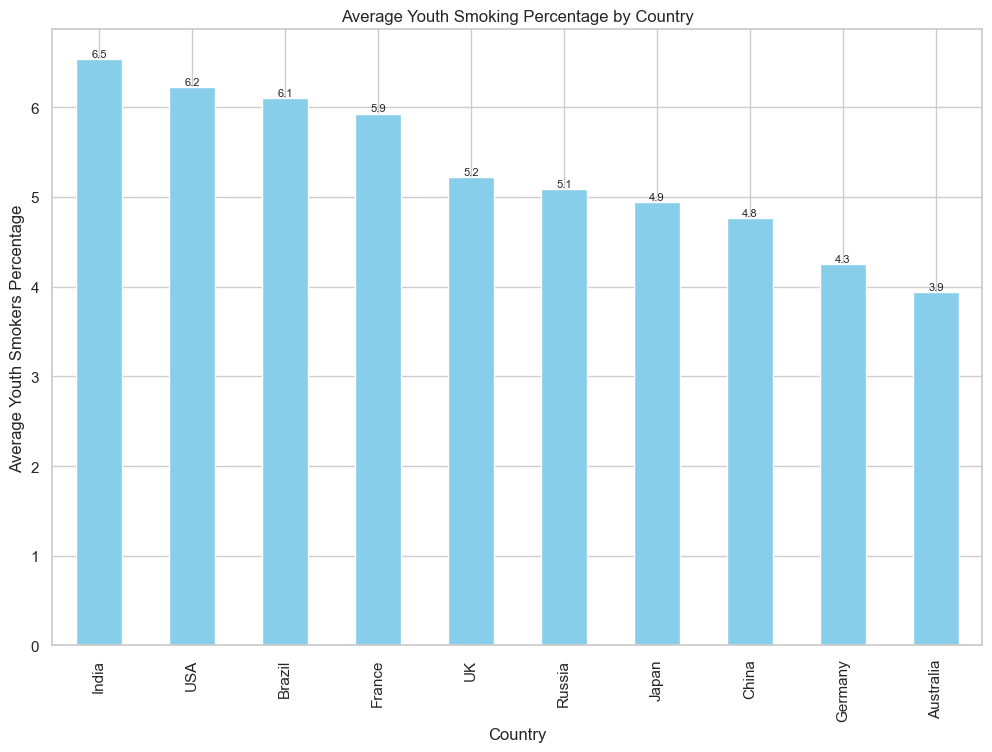

In [141]:
youth_smoking_by_country = df.groupby('Country')['Youth_Smokers_Percentage'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 8))
youth_smoking_by_country.plot(kind='bar', color='skyblue', ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Average Youth Smokers Percentage')
ax.set_title('Average Youth Smoking Percentage by Country')
ax.tick_params(axis='x', rotation=90)
for i, value in enumerate(youth_smoking_by_country):
    ax.text(i, value, f"{value:.1f}", ha='center', va='bottom', fontsize=8)
plt.show()

 **Correlation Analysis**

                          Youth_Smokers_Percentage  Legislation_Strength  \
Youth_Smokers_Percentage                  1.000000             -0.087656   
Legislation_Strength                     -0.087656              1.000000   
Anti_Smoking_Campaigns                   -0.001203             -0.020005   
Healthcare_Costs                         -0.009443              0.139152   

                          Anti_Smoking_Campaigns  Healthcare_Costs  
Youth_Smokers_Percentage               -0.001203         -0.009443  
Legislation_Strength                   -0.020005          0.139152  
Anti_Smoking_Campaigns                  1.000000          0.041936  
Healthcare_Costs                        0.041936          1.000000  


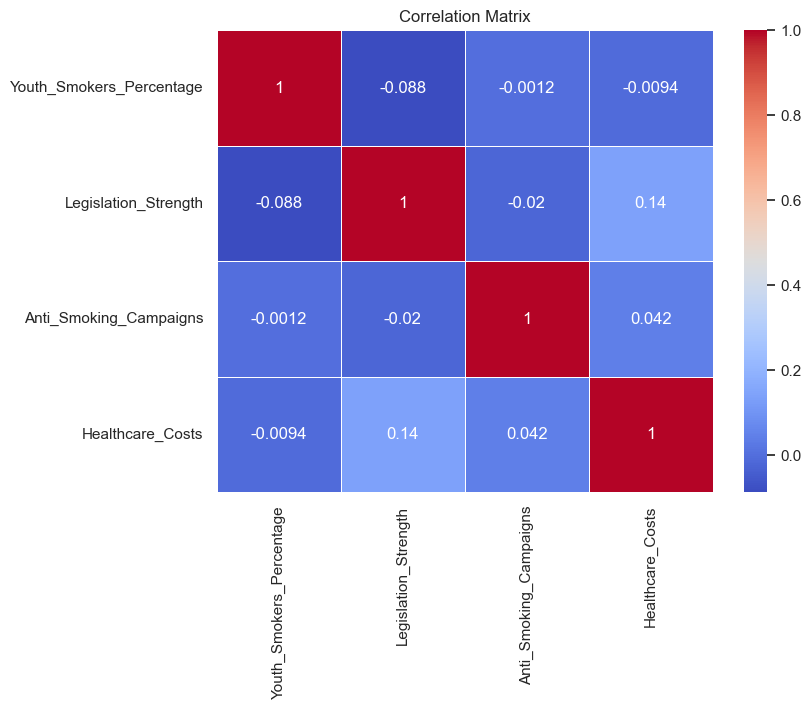

In [142]:
correlation_matrix = df[['Youth_Smokers_Percentage', 'Legislation_Strength', 'Anti_Smoking_Campaigns', 'Healthcare_Costs']].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### **Predictive Analysis**

The target value is the **Smoking_Population_Percentae** The goal of the predictive analysis is to use the other features (Male_Smokers_Percentage, etc.) to predict the future year.

**Categorical using One-hot Encoding**

In [143]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Country', 'City']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Country', 'City']))
df_encoded = pd.concat([df, encoded_df], axis=1)

In [144]:
X_ohe = df_encoded.drop(columns=['Country', 'City', 'Smoking_Population_Percentage']).dropna()
y = df['Smoking_Population_Percentage'].dropna()

**Feature selection using Lasso Regression**

In [145]:
lasso = Lasso(alpha=0.01) 
lasso.fit(X_ohe, y)

Lasso(alpha=0.01)

In [146]:
selected_features = np.where(lasso.coef_ != 0)[0]
selected_feature_names = X_ohe.columns[selected_features]

In [147]:
X_selected = X_ohe[selected_feature_names]
print("Selected Features:", selected_feature_names)


Selected Features: Index(['Year', 'Male_Smokers_Percentage', 'Smoking_Related_Deaths',
       'Death_History', 'Healthcare_Costs'],
      dtype='object')


**Model Training**

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [149]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)

In [150]:
arima = ARIMA(y_train, order=(1, 1, 1))
arima_fit = arima.fit()
arima_preds = arima_fit.forecast(steps=len(y_test))
arima_mae = mean_absolute_error(y_test, arima_preds)


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base

In [151]:
print("Linear Regression model MAE with selected features:", lr_mae)
print("ARIMA model MAE with selected features:", arima_mae)

Linear Regression model MAE with selected features: 0.00010176965654854487
ARIMA model MAE with selected features: 16.912442259471


**Interpretation**
1. **Linear Regression Model**
- The MAE is extremely low, suggesting that the Linear Regression model fits the data very well with the selected features.
- This low error indicates that the selected features are highly predictive of the target variable (Smoking_Population_Percentage).
2. **ARIMA Model**
- The MAE is significantly higher compared to the Linear Regression model.
- This suggests that the ARIMA model, which is typically used for time series data, might not be as suitable for this dataset or the current setup.

**Final Given the very low MAE, Linear Regression with the selected features is clearly outperforming the ARIMA model, for predicting *'Smoking_Population_Percentage'***


**Cross-Validaiton**

In [152]:
cv_scores = cross_val_score(lr, X_selected, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()

print(f"Cross-Validation MAE: {cv_mae}")

Cross-Validation MAE: 5.9036651769601704e-05


**Model Interpretation**

Understanding the impact of each feature on your predictions is crucial. Use the coefficients from the Linear Regression model to interpret feature importance.

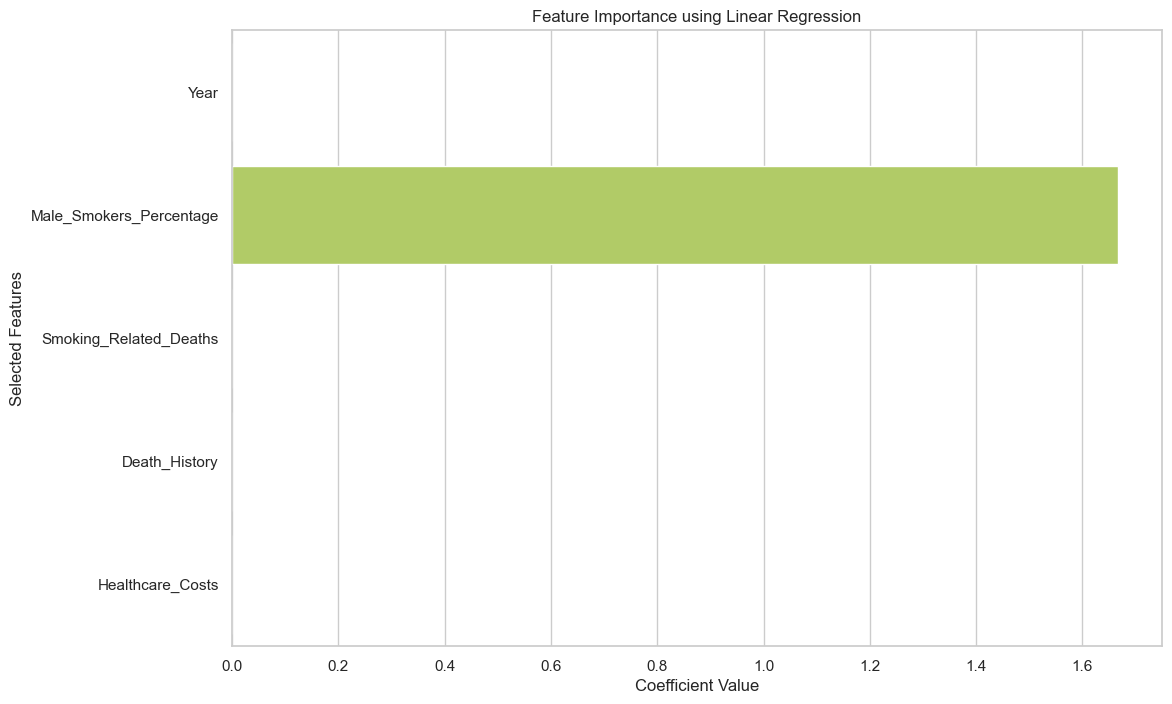

In [153]:
lr_coef = lr.coef_
plt.figure(figsize=(12, 8))
sns.barplot(x=lr_coef, y=selected_feature_names, palette="hls")
plt.xlabel('Coefficient Value')
plt.ylabel('Selected Features')
plt.title('Feature Importance using Linear Regression')
plt.show()


**Model Evaluation**

In [154]:
lr_preds = lr.predict(X_selected)
r2 = r2_score(y, lr_preds)
mse = mean_squared_error(y, lr_preds)
mape = mean_absolute_percentage_error(y, lr_preds)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

R-squared: 0.9999999999446466
Mean Squared Error: 1.7145169265272104e-08
Mean Absolute Percentage Error (MAPE): 0.00%
